<a href="https://colab.research.google.com/github/Ivanpillow/Clasificacion-Inteligente-de-Datos/blob/main/Hands-on%204%3A%20Logistic%20Regression%20(Tutorial)/Hands_on_4_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hans-On 4 Logistic Regression Notebook

Nombre: Diego Iván Hernández Muñoz

Profesor: Jose Antonio Aviña Mendez

Materia: Clasificacion inteligente de datos

# 1.1 Fundamentos sobre la regresión lógistica

La técnica de regresión lógistica es una clasificación binaria hecha especificamente para esta prediccion de resultados binarios (a diferencia de la regresión lineal con valores continuos). La variable objetivo (Y) se suele representar como 0 y 1.

El valor 1 habitualmente es representado como un evento exitoso, mientras que el valor 0 como un evento fallido.

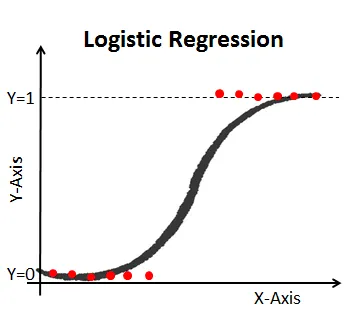

# 1.2 Modelo matemático de la regresión lógistica

El núcleo de la regresión lógistica, donde se asigna cualquier entrada a una salida entre 0 y 1 parte de la función lineal combinando las variables independientes

### **Función lineal:**

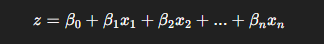

Pero al esta función no generar probabilidades, solo ∞ o −∞, se utiliza la función sigmoidea.







### **La función sigmoidea:**

Transforma los valores independientes en un valor entre 0 y 1, también se establece un umbral (normalmente 0.5) para poder clasificar e interpretar el resultado como probabilidad.

Si σ(x) ≥ 0.5 → se clasifica como 1

Si σ(x) < 0.5 → se clasifica como 0

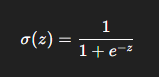

e: La base del logaritmo natural

x: El valor de entrada

σ(x): El valor de salida entre 0 y 1

### **Ecuación de regresión logística:**

La regresión logística se obtiene al aplicar la función sigmoidea al función  lineal.

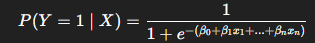




# 1.3 Descripción de librerias y funciones

In [65]:
import pandas as pd # Visualización de datos y creación de gráficos
import seaborn as sn # Lo utilicé solo para la matriz de confusión
import matplotlib.pyplot as plt # Gráficos
from sklearn.datasets import make_classification # Con make generaré el dataset para la clasificación
from sklearn.model_selection import train_test_split # División del modelo en prueba y entrenamiento
from sklearn.linear_model import LogisticRegression # Modelo de regresión logística
from sklearn.metrics import confusion_matrix, accuracy_score # Puntaje con accuracy y la matriz de confusión

Funciones utilizadas:

- make_classification(): para generar los datos aleatorios o el dataset a utilizar.
- train_test_split(): separa datos en entrenamiento y prueba.
- LogisticRegression(): la función principal que crea el modelo matemático.
- model.fit(): para entrenar el modelo.
- model.predict(): a manera de prediccion clasifica nuevos patrones.
- confusion_matrix(), accuracy_score(): solo se utilizan para evaluar el modelo.

# 1.4 Pipeline

## 1.4.1 Preprocesamiento de datos

Estadisticas:

            Num 1       Num 2       Clase
count  400.000000  400.000000  400.000000
mean     1.036259   -0.010640    0.500000
std      0.827994    1.319102    0.500626
min     -1.543624   -3.375238    0.000000
25%      0.588882   -1.047471    0.000000
50%      1.072628    0.052922    0.500000
75%      1.507836    0.967564    1.000000
max      4.503787    3.525672    1.000000




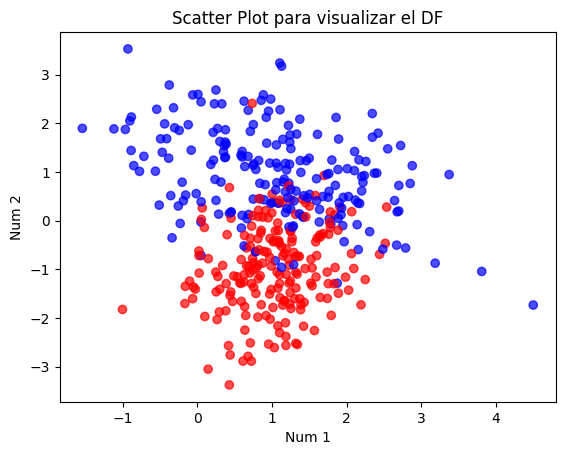

In [66]:
#GENERACION DEL DATASET
X, y = make_classification(
    n_samples=400,
    n_features=2,     # Solo dos características
    n_informative=2,   # De estas features solo 2 serán útiles
    n_redundant=0,    # Que no haya repetidos
    n_clusters_per_class=1,  # Clusters de datos generados
    random_state=18   # Utilice 18 para variar y probar otro que no fuera el estandar 42
  )

# Lo convertí a dataframe para mostrar las primeras filas y hacer un analisis estadístico
df = pd.DataFrame(X, columns=['Num 1', 'Num 2'])
df['Clase'] = y
df.head()

# Estadísticas básicas
print("Estadisticas:\n")
print(df.describe())

# Scatter plot
print("\n")
plt.scatter(df['Num 1'], df['Num 2'], c=df['Clase'], cmap='bwr', alpha=0.7)
plt.title("Scatter Plot para visualizar el DF")
plt.xlabel("Num 1")
plt.ylabel("Num 2")
plt.show()

## 1.4.2 Divisón del dataset

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)

print(f'El tamaño que se le asigno a entrenamiento es: {len(X_train)}')
print(f'El tamaño que se le asigno a prueba es: {len(X_test)}')

El tamaño que se le asigno a entrenamiento es: 280
El tamaño que se le asigno a prueba es: 120


## 1.4.3 Entrenamiento del modelo

In [68]:
#SE CREA EL MODELO CON LA FUNCION DE SKLEARN
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=500)

# Se entrena el modelo con la función fit
model.fit(X_train, y_train)

print("Coeficientes del modelo:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes del modelo: [[-0.56490871 -2.13949383]]
Intercepto: [0.62306498]


- En penalty utilizo "l2" ayudando a evitar el overfitting, con suma de los cuadrados de los coeficientes haciendo a los coeficientes hacia valores pequeños y estables, además de que es estándar.
- C al ser el inverso de la regularización dejandolo en "1.0" también por ser estándar y recomendacion de la documentación de scikit-learn.
- Dentro del solver "lbfgs" debido a que es un dataset sintético y pequeño, ademas de ser bueno con el penalty l2.

## 1.4.4 Función de predicción

In [69]:
# PREDICCION
# Ahora dos conjuntos de datos nuevos para clasificar
new_data = [[1.5, -0.5], [0.5, 1.5]]

# Ahora se usa el modelo de predict para la predicción
predictions = model.predict(new_data)
print(f'Predicciones:, {predictions}')

Predicciones:, [1 0]


## 1.4.5 Evaluación del modelo

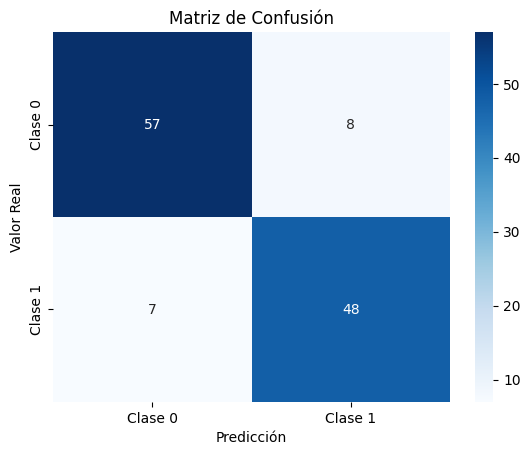


Accuracy del modelo: 0.8750


In [70]:


y_pred = model.predict(X_test)

# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
sn.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del modelo: {accuracy:.4f}")


# Bibliografía

*   Viswa. (2024, March 24). Logistic Regression. Medium. https://medium.com/@vk.viswa/logistic-regression-d001d0bce6c7
*   Tello, D. (2020, February 29). Regresión Logística en Python y R. Machine Learning #02. Medium. https://dtellogaete.medium.com/regresi%C3%B3n-log%C3%ADstica-en-python-y-r-machine-learning-02-fa066b3add09
*   scikit-learn. (2014). LogisticRegression. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
